In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import STOPWORDS
filepath = r'stack-overflow-developer-survey-2024\survey_results_public.csv'
data = pd.read_csv(filepath)
df = data.copy()
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Let's create a word cloud for starters

In [92]:
# 1. Combine all the languagehaveworkedwith column values into one big text string
text = ' '.join(df['LanguageHaveWorkedWith'].astype(str).tolist())

#Note I updated this to keep + and =
text = re.sub(r'[^A-Za-z\s#+]', ' ', text) # 2. Remove everything that's NOT a letter (keep only A-Z, a-z, and spaces)

text = text.lower() # 3. Convert all letters to lowercase

stopwords = set(STOPWORDS) # 4. Remove common stopwords (like "the", "is", "and", etc.)
stopwords.add("nan")
text = ' '.join(word for word in text.split() if word not in stopwords)

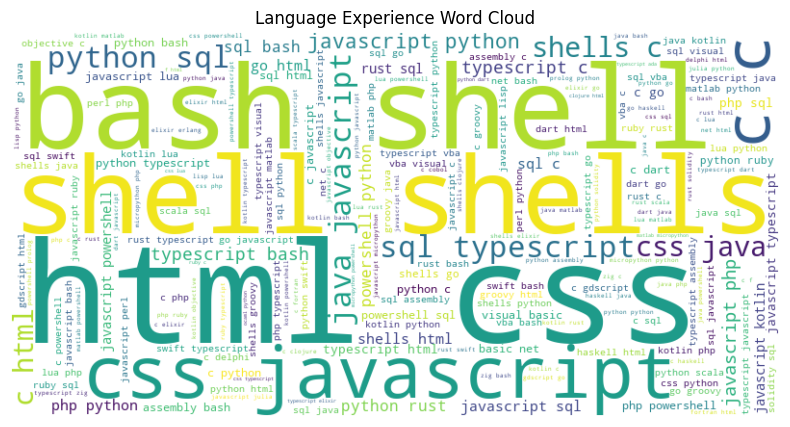

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Language Experience Word Cloud")
plt.show()


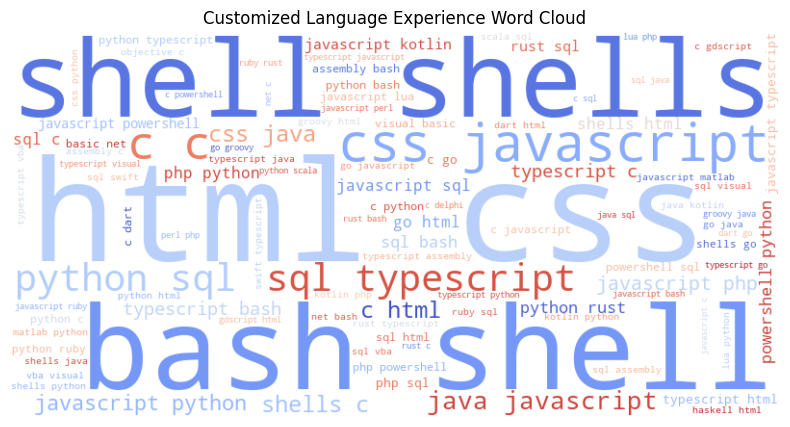

In [94]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customized Language Experience Word Cloud")
plt.show()

The word cloud doesn't really reveal anything. Let's keep it simple and create a bar graph

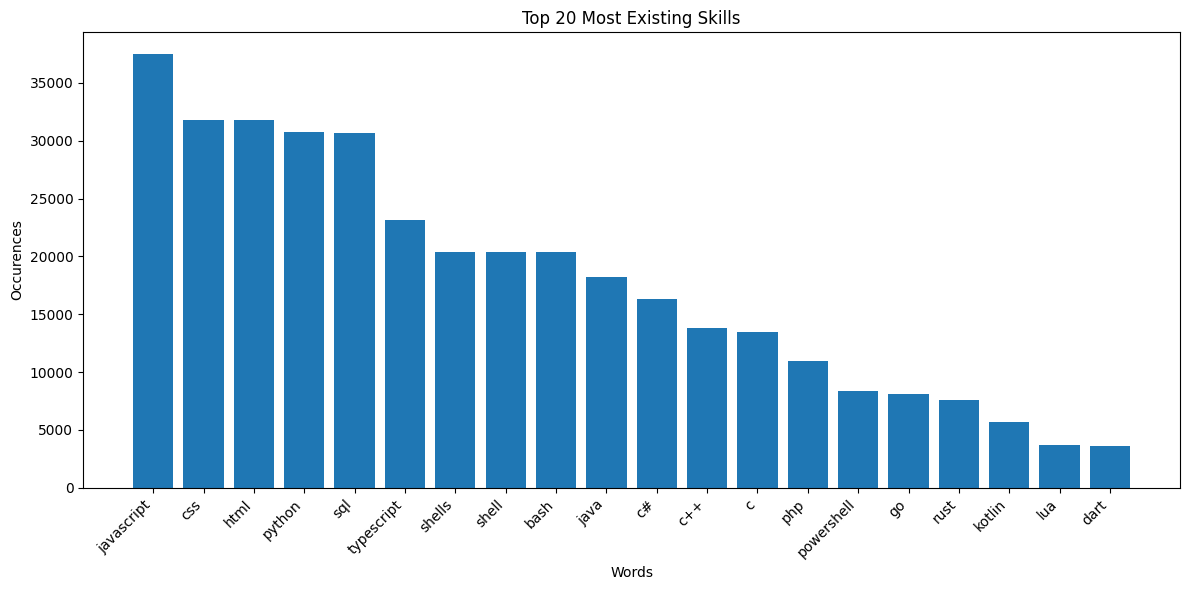

In [95]:
from collections import Counter
# Let's plot the occurances of each language experience instead of a word cloud
# Bar chart with day against tip
# Step 3: Count word occurrences
words = [word for word in text.split() if word not in stopwords]
word_counts = Counter(words)

# Step 4: Create DataFrame from the counts
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Step 5: Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Count'][:20])  # Top 20 words
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Occurences')
plt.title('Top 20 Most Existing Skills')
plt.tight_layout()
plt.show()

Option 1 Vertical Bar Graph

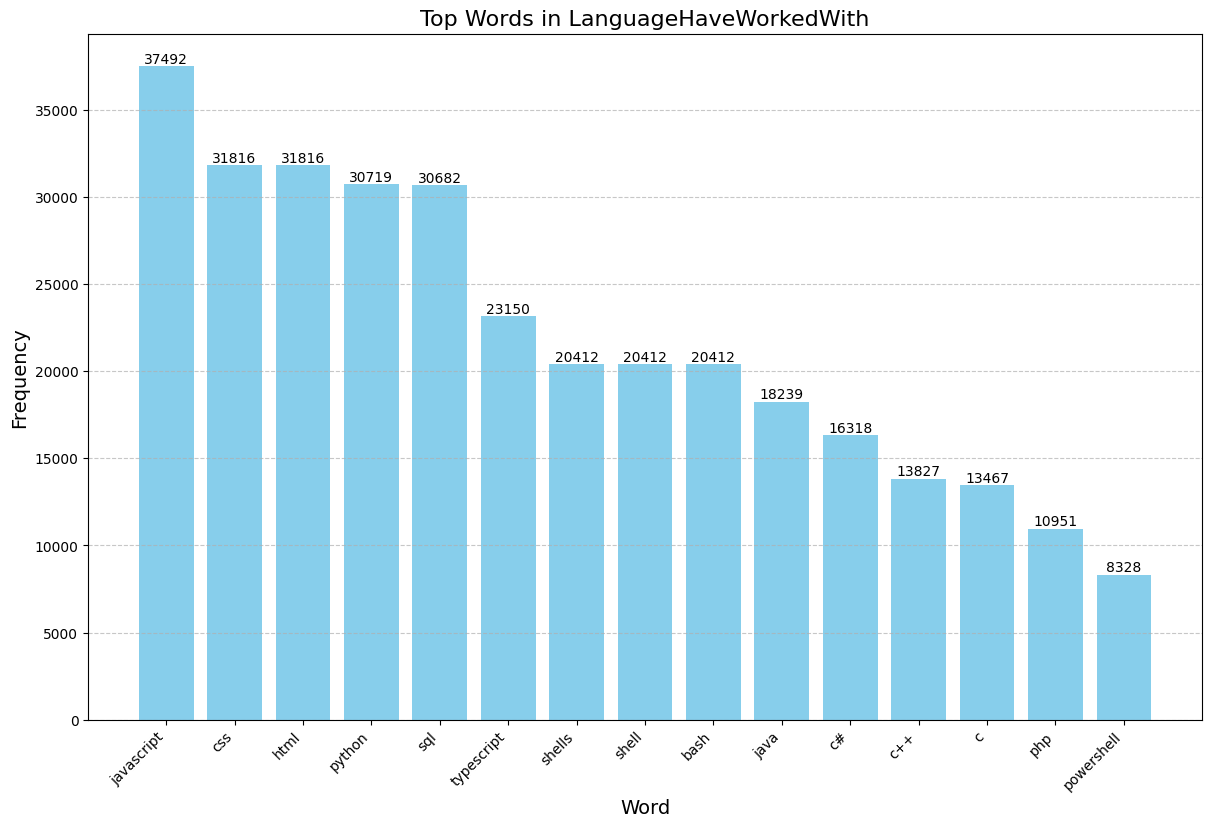

In [96]:
# 7. Plot the bar graph
plt.figure(figsize=(12, 8))
plt.title('Top Words in LanguageHaveWorkedWith', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
bars = plt.bar(word_freq_df['Word'][:15], word_freq_df['Count'][:15], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

Option 2: Plot horizontal bar graph

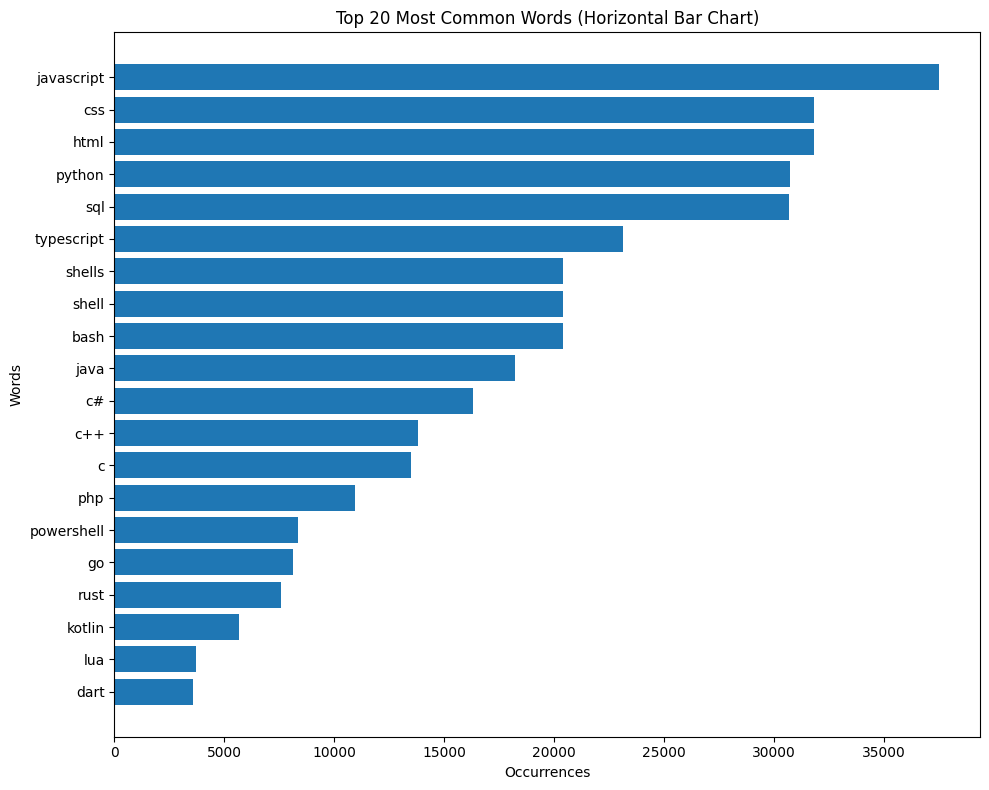

In [97]:
plt.figure(figsize=(10, 8))
plt.barh(word_freq_df['Word'][:20], word_freq_df['Count'][:20])  # Top 20 words
plt.gca().invert_yaxis()  # Most frequent word at the top
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words (Horizontal Bar Chart)')
plt.tight_layout()
plt.show()

Analyze Survey Distribution

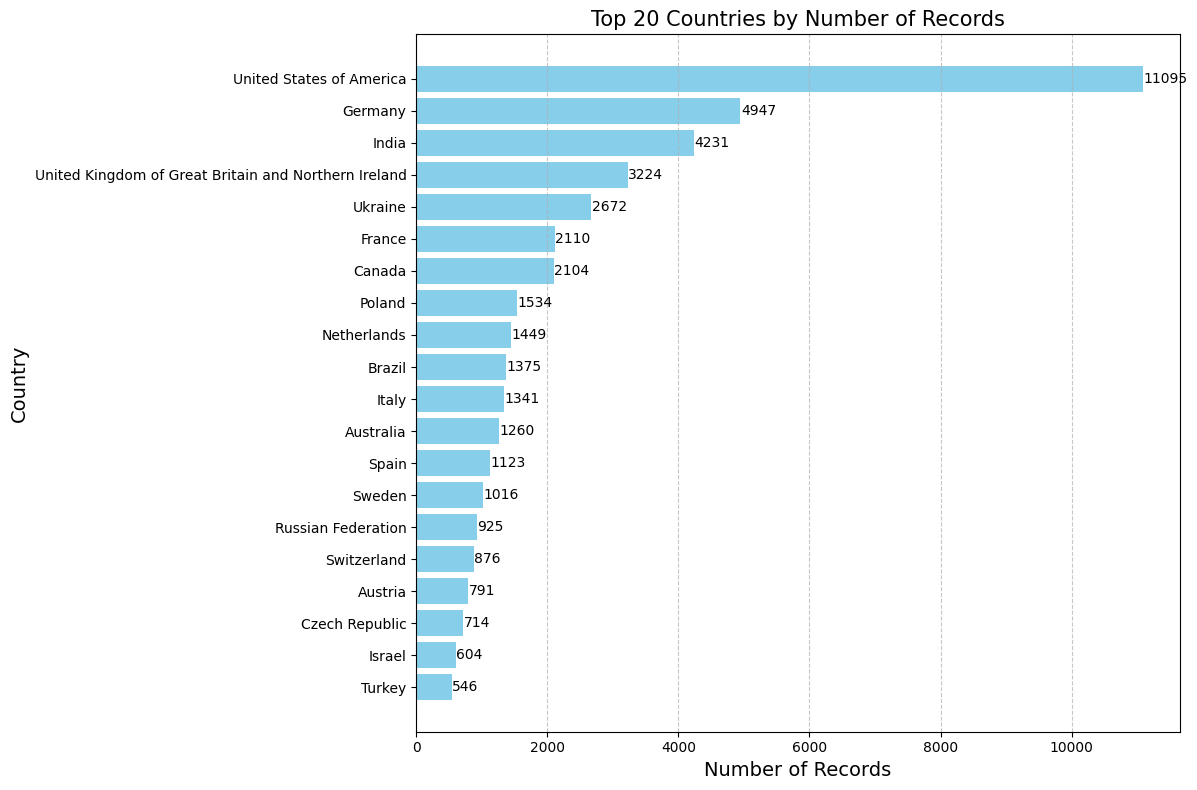

In [98]:
#group by country and count the number of records
country_counts = df['Country'].value_counts().nlargest(20)

#plot on horizontal bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(country_counts.index, country_counts.values, color='skyblue')

# Add counts next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, int(width), va='center', fontsize=10)

# Finalize plot
plt.title('Top 20 Countries by Number of Records', fontsize=15)
plt.xlabel('Number of Records', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.gca().invert_yaxis()  # Highest count at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Investigate USA compensation Survey Results

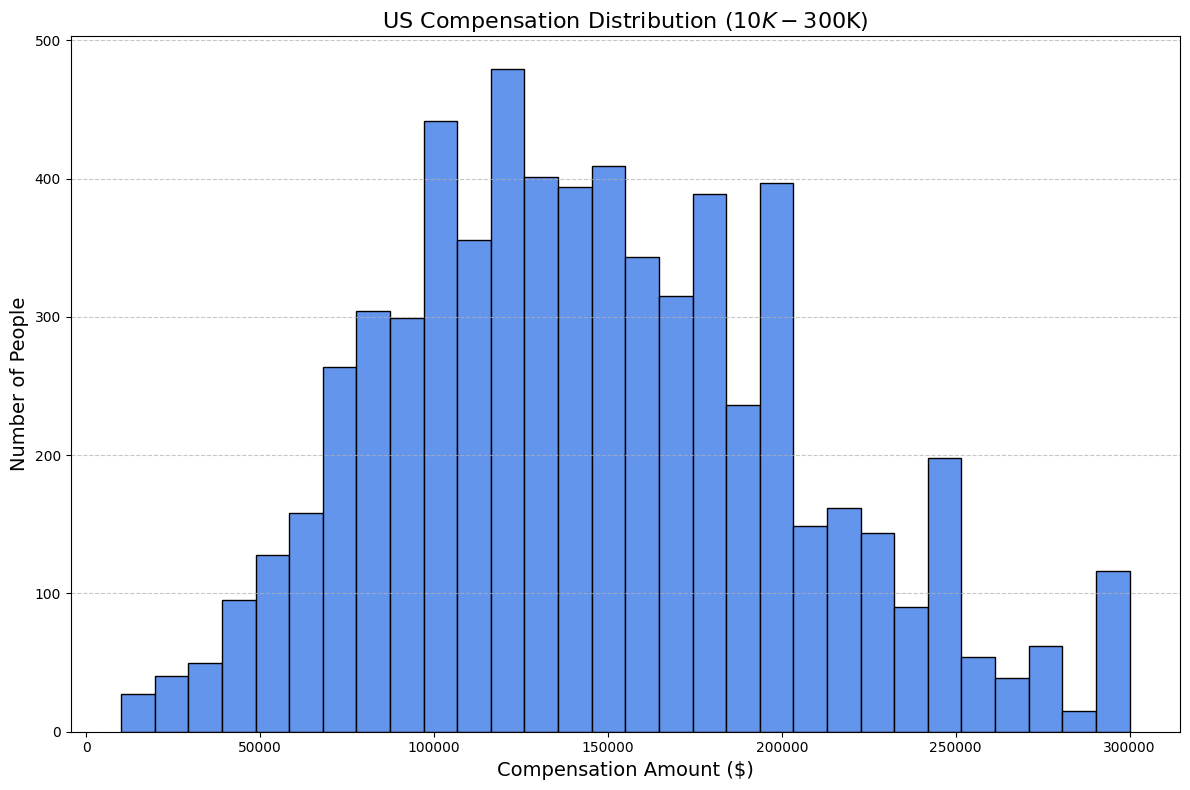

In [99]:
# Filter US compensation data
us_comp = df[df['Country'] == 'United States of America']['CompTotal']

# Drop missing or invalid values
us_comp = us_comp.dropna()

# Filter for compensation between 10,000 and 300,000
us_comp = us_comp[(us_comp >= 10000) & (us_comp <= 300000)]

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(us_comp, bins=30, color='cornflowerblue', edgecolor='black')

# Finalize plot
plt.title('US Compensation Distribution ($10K - $300K)', fontsize=16)
plt.xlabel('Compensation Amount ($)', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Additional questions
-age distribution
-remote distribution
-highest achieved degree distribution
-code experience vs compensation
-do contract/freelancers make more than the average?